# AdalineGD

In [1]:
from Adaline import AdalineGD

# Estructura base de la clase AdalineGD

```Python


class AdalineGD(object):
    """ADAptative LInear NEuron classifier
    
    Parameters
    ----------
    eta : float
        Learning rate between 0.0 and 1.0
    n_iter : int
        Passes over the trainning dataset
    random_state : int
        Random number generatos seed for random weight initialization.
        
    Attributes
    ----------
    
    w_ : 1d-array
        Weights after fitting
    cost_ : list
        Sum-of-squares cost function value in each epoch.
        
    """
    
    
    def __init__ (self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
        
    def fit(self, X, y):
        """ Fit data.
        
        Parameters
        ----------
        X: {array-like}, shape = [n_examples, n_features]
            Trainning vectors, where n_examples 
            is the number of examples and
            n_features is the number of features.
        y : arra-like, shape = [n_examples]
            Target values.
            
        Returns
        -------
        self : object
        
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            # TODO
            pass
        
        return self
    
            
    def net_input(self, X):
        """ Calculate net input """    
        # TODO
        return false
    
    
    def activation(self, X):
        """ Compute linear activation"""
        return X
    
    
    def predict(self, X):
        """ Return class label after unit step"""
        # TODO
        return false
 ```

## Entrenando Adaline con Iris

In [2]:
import os
import pandas as pd
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases','iris','iris.data')

print('URL', s)

URL https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [3]:
df = pd.read_csv(s, header = None, encoding = 'utf-8')

In [4]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<function matplotlib.pyplot.show(close=None, block=None)>

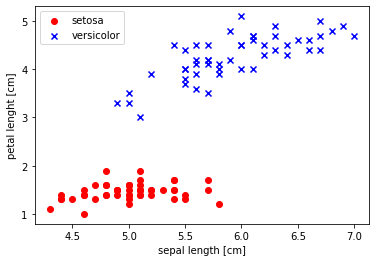

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where( y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

#plot data
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal lenght [cm]')
plt.legend(loc='upper left')
plt.show

In [6]:
ada1 = AdalineGD(n_iter = 10, eta = 0.01).fit(X, y)

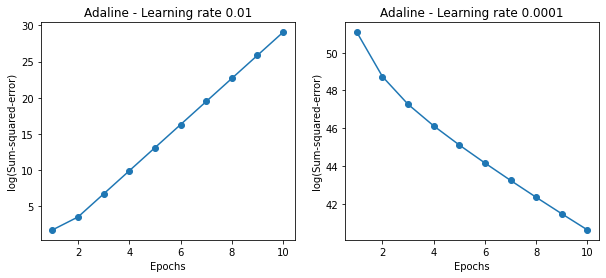

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ax[0].plot (range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker= 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X, y)
ax[1].plot (range(1, len(ada2.cost_) + 1), ada2.cost_, marker= 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

## Mejora del gradiente descendente a través de escalado de características

Muchos algoritmos de machine learning requieren algun tipo de scalado de características para mejorar su desempeño.

El gradiente descendente es uno de los algoritmos que se benefician con el escalado de características. Un método para el escalado de características es la estandarización. Este escalado de a los datoslas propiedades de una distribución normal estandar: media cero y varianza unitaria. Esta proceso de normalización ayuda al GD a converger más rápidamente. Sin embargo, no hace a la muestra de datos original se distribuya normalmente. La normalización desplaza la media de cada característica para que se centre en cero y cada característica tenga una desviación estándar de 1 (varianza unitaria). Por ejemplo, para estandarizar la n-esima característica, podemos simplemente restar la media de la muestra, $\mu_j$, de cada ejemplo de entrenamiento y dividirla por su desviación estándar $\sigma_j$:

$x'_j = \frac{x_j - \mu_j}{\sigma_j}$

In [8]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [9]:
ada_gd = AdalineGD(n_iter = 15, eta = 0.01)
ada_gd.fit(X_std, y)

In [10]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],label=cl, edgecolor='black')

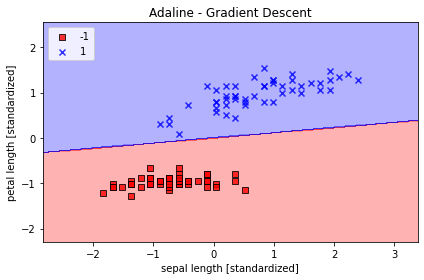

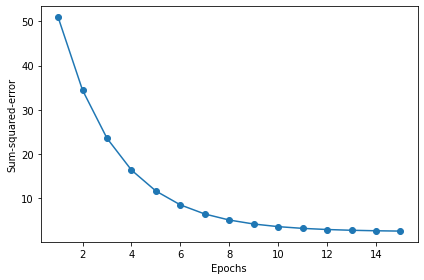

In [11]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()